# Part - 1 - Data Prepocessing

# Import Librabies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import training data set

In [101]:
df = pd.read_csv('BARC.L.csv')

In [102]:
df.dropna(inplace=True)

In [176]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-08-03,276.061005,310.654999,273.890015,297.954010,241.570679,139239547.0
1,2009-08-04,300.263000,306.683014,297.815002,303.450012,246.026733,0.0
2,2009-08-05,303.911987,320.954987,303.080994,310.839996,252.018234,70633149.0
3,2009-08-06,316.937012,335.041992,315.828003,327.006012,265.125000,67682351.0
4,2009-08-07,319.200012,339.891998,312.087006,337.166992,273.363251,71910369.0


# Create training data set with only Open column

In [103]:
training_set = df.iloc[:,1:2].values

# Feature Scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [105]:
training_set_scaled

array([[0.64216878],
       [0.74709422],
       [0.76291405],
       ...,
       [0.24105278],
       [0.23168836],
       [0.220503  ]])

# Creating data structure with 60 timestamp and 1 output

In [106]:
X_train = []
y_train = []

for i in range(60, 2294):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [178]:
## X_train contain 60 previous stock price
X_train[0]

array([[0.64216878],
       [0.74709422],
       [0.76291405],
       [0.8193828 ],
       [0.82919382],
       [0.86944371],
       [0.84701664],
       [0.80837084],
       [0.8730464 ],
       [0.89467142],
       [0.87104342],
       [0.82699133],
       [0.81557622],
       [0.84701664],
       [0.82258659],
       [0.88706277],
       [0.86303599],
       [0.89407314],
       [0.89307158],
       [0.94713408],
       [0.96315343],
       [0.89707754],
       [0.87424734],
       [0.86744072],
       [0.88706277],
       [0.89507456],
       [0.86703746],
       [0.91910134],
       [0.93071595],
       [0.90708795],
       [0.93912665],
       [0.93512069],
       [0.99098678],
       [0.955146  ],
       [0.94954033],
       [0.93892713],
       [0.92530967],
       [0.92550905],
       [0.89907616],
       [0.87544815],
       [0.93512069],
       [0.92150322],
       [0.93431865],
       [0.89307158],
       [0.88686338],
       [0.90107914],
       [0.9165002 ],
       [0.945

In [179]:
y_train

array([0.84801806, 0.81297509, 0.71285315, ..., 0.24105278, 0.23168836,
       0.220503  ])

# Reshaping

In [108]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part - 2 - Build RNN

# Import Keras libraries and packages

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropoutregressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(.2))

In [114]:
# Initialize RNN
regressor = Sequential()

# Adding first LSTM layer and some dropout regularization

In [115]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(.2))

# Adding Second LSTM layer and some dropout regularization

In [116]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(.2))

# Adding Third LSTM layer and some dropout regularization

In [117]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(.2))

# Adding Fourth LSTM layer and some dropout regularization

In [118]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(.2))

# Adding output layer

In [119]:
regressor.add(Dense(units=1))

# Compiling the RNN

In [120]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN with Training data set

In [121]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2234/2234 [==============================] - 20s 9ms/step - loss: 0.0225
Epoch 2/100
2234/2234 [==============================] - 13s 6ms/step - loss: 0.0070
Epoch 3/100
2234/2234 [==============================] - 9s 4ms/step - loss: 0.0055
Epoch 4/100
2234/2234 [==============================] - 8s 4ms/step - loss: 0.0048
Epoch 5/100
2234/2234 [==============================] - 8s 4ms/step - loss: 0.0047
Epoch 6/100
2234/2234 [==============================] - 8s 3ms/step - loss: 0.0045
Epoch 7/100
2234/2234 [==============================] - 8s 4ms/step - loss: 0.0043
Epoch 8/100
2234/2234 [==============================] - 8s 3ms/step - loss: 0.0040
Epoch 9/100
2234/2234 [==============================] - 8s 4ms/step - loss: 0.0039
Epoch 10/100
2234/2234 [==============================] - 8s 3ms/step - loss: 0.0038
Epoch 11/100
2234/2234 [==============================] - 8s 4ms/step - loss: 0.0040
Epoch 12/100
2234/2234 [==============================] - 8s 4ms/step - 

# Part - 3 - Making prediction and visualization

# Getitng real stock price of Barclays Bank in 2018

In [122]:
test_data = pd.read_csv('BARC.L (2).csv')
real_stock_price = test_data.iloc[:, 1:2].values

# Getting the predicted stock price of 2018

In [140]:
dataset_total = pd.concat((df['Open'], test_data['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [145]:
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualize the result

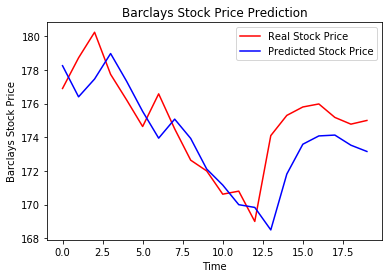

In [181]:
plt.plot(real_stock_price, color='red', label = 'Real Stock Price')
plt.plot(predicted_stock_price,color='blue', label = 'Predicted Stock Price')
plt.title('Barclays Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Barclays Stock Price')
plt.legend()